In [4]:
#installing pyspark
!pip install pyspark
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=7b8033a19561b2c7193acfe11cd95ea3feb22bc61b240fc9cdc3cc9c32ab5b3e
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [5]:
# Initializing a Spark Session:

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Colab") \
    .config("spark.sql.warehouse.dir", "/content/spark-warehouse") \
    .enableHiveSupport() \
    .getOrCreate()

In [6]:
# Setting up Hadoop Configuration

import os

# Setting Hadoop home directory and appending to system path
os.environ["HADOOP_HOME"] = "/usr/local/hadoop"
os.environ["PATH"] += os.pathsep + os.path.join(os.environ["HADOOP_HOME"], "bin")

In [7]:
# reading the csv file.
csv_file_path = '/content/drive/MyDrive/BostonHousing.csv'

df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

df.show()



+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [8]:
# saving  the data frame as a hive table
hive_table_name = 'data'


df.write.mode('overwrite').saveAsTable(hive_table_name)

In [9]:
# Querying the Hive table
spark.sql(f"SELECT * FROM {hive_table_name}").show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [10]:
# Task 1: Data Overview

#Retrieving and displaying the first 5 rows of the dataset to get a sense of the data's structure.

query= "SELECT * FROM data LIMIT 5"

spark.sql(query).show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [11]:
# Finding the total number of records in the dataset.
query="SELECT COUNT(*) FROM data"
spark.sql(query).show()

+--------+
|count(1)|
+--------+
|     506|
+--------+



In [12]:
# Task 2: Descriptive Statistics

# Calculating and displaying basic statistics (mean, standard deviation, min, max) for the "medv" (median home value) column.

query="SELECT MEAN(MEDV) AS AVERAGE_PRICE,MEDIAN(MEDV) AS MEDIAN_PRICE,STDDEV_POP(MEDV) AS STANDARD_DEVIATION, MIN(MEDV) AS MINIMUM_PRICE,MAX(MEDV) AS MAX_PRICE FROM data"
spark.sql(query).show()

+------------------+------------+------------------+-------------+---------+
|     AVERAGE_PRICE|MEDIAN_PRICE|STANDARD_DEVIATION|MINIMUM_PRICE|MAX_PRICE|
+------------------+------------+------------------+-------------+---------+
|22.532806324110698|        21.2|   9.1880115452782|          5.0|     50.0|
+------------------+------------+------------------+-------------+---------+



In [13]:
# Calculating and displaying the mean "rm" (average number of rooms per dwelling).

query="SELECT MEAN(RM) AS AVERAGE_ROOMS FROM data"
spark.sql(query).show()

+-----------------+
|    AVERAGE_ROOMS|
+-----------------+
|6.284634387351787|
+-----------------+



In [14]:
# Task 3: Data Exploration

# Identifying the property with the highest crime rate ("crim")
query="SELECT * FROM data WHERE CRIM = (SELECT MAX(CRIM) FROM DATA) "
spark.sql(query).show()

+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



In [15]:
# Finding the property with the lowest median home value ("medv")
query="SELECT * FROM data WHERE MEDV = (SELECT MIN(MEDV) FROM DATA) "
spark.sql(query).show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2| 396.9|30.59| 5.0|
|67.9208|0.0| 18.1|   0|0.693|5.683|100.0|1.4254| 24|666|   20.2|384.97|22.98| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+



+-----+
|COUNT|
+-----+
| 74.5|
| 56.8|
| 98.3|
| 78.9|
| 15.7|
| 67.0|
| 96.8|
| 54.2|
| 66.2|
| 95.7|
| 56.5|
| 32.3|
| 49.9|
| 98.1|
| 86.9|
| 83.5|
| 94.9|
| 90.3|
| 97.1|
| 65.4|
+-----+
only showing top 20 rows



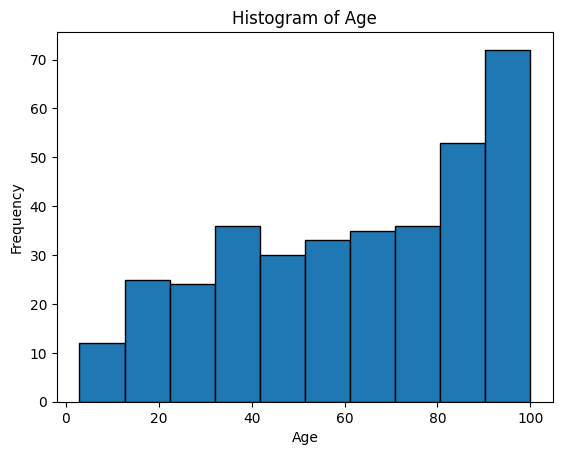

In [16]:
# Task 4: Data Distribution Analysis.

# Creating a histogram showing the distribution of the "age" column.

import matplotlib.pyplot as plt
import numpy as np

query="SELECT AGE AS COUNT FROM data GROUP BY AGE"
df=spark.sql(query)
df.show()
pandas_df = df.toPandas()

plt.hist(pandas_df, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Calculating the percentage of properties with a "chas" value of 1 (indicating proximity to the Charles River).

query="""
SELECT
    ROUND((COUNT(CASE WHEN chas = 1 THEN 1 END) * 100.0) / COUNT(*),2) AS percentage_of_property_with_chas_1
FROM
    data
"""
spark.sql(query).show()

+----------------------------------+
|percentage_of_property_with_chas_1|
+----------------------------------+
|                              6.92|
+----------------------------------+



In [ ]:
# Task 5: Correlation Analysis

# Calculating the correlation coefficient between "rm" and "medv."
#Explain the relationship between the average number of rooms and median home value.

query="SELECT CORR(RM,MEDV) AS CORRELATION_COEFFICIENT FROM data"
spark.sql(query).show()

print("there is positive relation between rm and medv ,meaning as rm increase medv increase")

+-----------------------+
|CORRELATION_COEFFICIENT|
+-----------------------+
|     0.6953599470715401|
+-----------------------+

there is positive relation between rm and medv ,meaning as rm increase medv increase


In [ ]:
# Investigating if there is any correlation between "ptratio" (pupil-teacher ratio) and "nox" (nitrogen oxide concentration).
query="SELECT CORR(PTRATIO,NOX) AS CORRELATION_COEFFICIENT FROM data"
spark.sql(query).show()

print("there is almost no correlation between ptratio and nox")

+-----------------------+
|CORRELATION_COEFFICIENT|
+-----------------------+
|    0.18893267711276893|
+-----------------------+

there is almost no correlation between ptratio and nox


In [ ]:
# Task 6 : Advanced Querying

# HiveQL query to identify and display the top 5 neighborhoods with the highest median home values ("medv").

query="SELECT DISTINCT(*) FROM data ORDER BY MEDV DESC LIMIT 5"
spark.sql(query).show()

+-------+---+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.46336|0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
|2.01019|0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|8.26725|0.0| 18.1|   1|0.668|5.875|89.6|1.1296| 24|666|   20.2|347.88| 8.88|50.0|
|0.52693|0.0|  6.2|   0|0.504|8.725|83.0|2.8944|  8|307|   17.4| 382.0| 4.63|50.0|
|1.51902|0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [18]:
# Calculate and report the average property age for neighborhoods with a "chas" value of 1 compared to those with "chas" value of 0.
query="SELECT CHAS,AVG(AGE) AS AVERAGE_AGE FROM data GROUP BY CHAS"
spark.sql(query).show()

+----+-----------------+
|CHAS|      AVERAGE_AGE|
+----+-----------------+
|   1|77.50000000000001|
|   0|67.91167728237794|
+----+-----------------+



In [ ]:
# Task 7: Visualization

# Creating a Hive view named "property_age_view" that includes the "age" and "medv" columns.
spark.sql("DROP VIEW IF EXISTS property_age_view")
query = """
CREATE VIEW property_age_view
AS
            SELECT
                    AGE, MEDV
            FROM
                    data
"""
spark.sql(query)
spark.table("property_age_view").show()

+-----+----+
|  AGE|MEDV|
+-----+----+
| 65.2|24.0|
| 78.9|21.6|
| 61.1|34.7|
| 45.8|33.4|
| 54.2|36.2|
| 58.7|28.7|
| 66.6|22.9|
| 96.1|27.1|
|100.0|16.5|
| 85.9|18.9|
| 94.3|15.0|
| 82.9|18.9|
| 39.0|21.7|
| 61.8|20.4|
| 84.5|18.2|
| 56.5|19.9|
| 29.3|23.1|
| 81.7|17.5|
| 36.6|20.2|
| 69.5|18.2|
+-----+----+
only showing top 20 rows



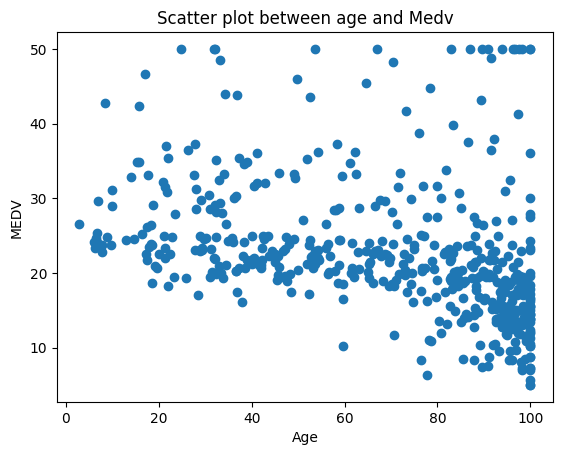

In [ ]:
# Plotting a scatter plot of property age against median home value using a data visualization tool of your choice.

pandas_df = spark.table("property_age_view").toPandas()

plt.scatter(pandas_df['AGE'],pandas_df['MEDV'])
plt.title('Scatter plot between age and Medv')
plt.xlabel('Age')
plt.ylabel('MEDV')
plt.show()


In [ ]:
# Task 8: Outliers Detection

# a query to identify and report properties with a "crim" value greater than 10 (considered as potential outliers).
query="SELECT * FROM boston_data WHERE CRIM > 10"
spark.sql(query).show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|6.545| 99.1|1.5192| 24|666|   20.2| 396.9|21.0

In [ ]:
# Task 9: Hypothesis Testing

# Formulate a hypothesis about the impact of the "rm" (average number of rooms) on median home value.

# Hypothesis:
# There is a positive correlation between the average number of rooms (rm) and median home value (medv).

# Null hypothesis:
# H0: ρ(rm, medv) = 0

# Alternative hypothesis:
# Ha: ρ(rm, medv) > 0


In [ ]:
# Conducting a hypothesis test using HiveQL to determine if there is a statistically significant relationship between these variables.

# Calculating the correlation coefficient between "rm" and "medv."
query = """
SELECT CORR(RM, MEDV) AS correlation_coefficient
FROM data
"""
correlation_coefficient = spark.sql(query).first().correlation_coefficient

from scipy.stats import ttest_1samp # Import the ttest_1samp function for hypothesis testing

# Performing a one-sample t-test to test the hypothesis.
# Extracting the "rm" and "medv" values into Python lists.
rm_values = spark.sql("SELECT RM FROM data").rdd.flatMap(lambda x: x).collect()
medv_values = spark.sql("SELECT MEDV FROM data").rdd.flatMap(lambda x: x).collect()

# Calculating the t-statistic and p-value.
t_statistic, p_value = ttest_1samp(rm_values, popmean=np.mean(medv_values))

# Setting the significance level.
alpha = 0.05

# Making a conclusion based on the p-value and significance level.
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant positive correlation between the average number of rooms (rm) and median home value (medv).")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that there is a statistically significant positive correlation between the average number of rooms (rm) and median home value (medv).")

Reject the null hypothesis. There is a statistically significant positive correlation between the average number of rooms (rm) and median home value (medv).
